# Load Datasets dari kaggle Food-101

In [1]:
#instal library kaggle
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mfathurrohmanharis","key":"f14e4f2dcd158d570de165a8be9f6b07"}'}

In [3]:
#buat kaggle folder
!mkdir ~/.kaggle

In [4]:
#copy kaggle.json ke folder yang sudah dibuat
!cp kaggle.json ~/.kaggle/

In [5]:
#beri akses untuk json (read and write)
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle datasets download 'kmader/food41'

In [ ]:
# folder_path = "./food-image"  # Ganti dengan path folder yang sesuai
# directories = os.listdir(folder_path)

# for directory in directories:
#     if os.path.isdir(os.path.join(folder_path, directory)):
#         print(directory)

#----------------------------------------------------------------------
# os.chdir('../')
# dir = os.getcwd()
# print('posisi : ', dir)

In [6]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from kaggle.api.kaggle_api_extended import KaggleApi

In [7]:
# Dataset 101
api = KaggleApi()

api.authenticate()

dataset_id = 'kmader/food41'

chooseClass = ['fried_rice', 'omelette', 'tiramisu', 'spring_rolls', 'donuts', 'chicken_wings',
               'chocolate_cake', 'churros', 'ice_cream', 'waffles', 'takoyaki', 'onion_rings',
               'mussels', 'macarons', 'cup_cakes', 'hamburger', 'edamame']

os.makedirs('./tmp', exist_ok=True)

os.chdir('./tmp')

api.dataset_download_files(dataset_id, unzip=True)

os.chdir('../')

In [8]:
dataset_dir = os.path.join('./tmp/', 'images')

os.makedirs('./food-images', exist_ok=True)

for kelas in chooseClass:
  kelas_dir = os.path.join(dataset_dir, kelas)
  tujuan_dir = os.path.join('./food-images', kelas)

  os.makedirs(tujuan_dir, exist_ok=True)

  gambar = os.listdir(kelas_dir)

  # pilihGambar = gambar[:500]

  for gambar_file in gambar:
    source = os.path.join(kelas_dir, gambar_file)
    direction = os.path.join(tujuan_dir, gambar_file)
    shutil.copyfile(source, direction)
print("complete!!")

complete!!


Ekstrak `zip` hasil download dari `kaggle`

In [ ]:
# zip_ref = zipfile.ZipFile("./food41.zip", 'r')
# zip_ref.extractall("tmp/")
# zip_ref.close()

In [9]:
#melihat jumlah gambar di setiap kategori
source_path = './food-images'
categories = os.listdir(source_path)

for category in categories:
  category_dir = os.path.join(source_path, category)
  images = os.listdir(category_dir)
  jml_images = len(images)
  print(f"Terdapat {jml_images} img di kategori {category}")

Terdapat 1000 img di kategori omelette
Terdapat 1000 img di kategori macarons
Terdapat 1000 img di kategori churros
Terdapat 1000 img di kategori hamburger
Terdapat 1000 img di kategori tiramisu
Terdapat 1000 img di kategori chicken_wings
Terdapat 1000 img di kategori cup_cakes
Terdapat 1000 img di kategori mussels
Terdapat 1000 img di kategori spring_rolls
Terdapat 1000 img di kategori takoyaki
Terdapat 1000 img di kategori chocolate_cake
Terdapat 1000 img di kategori ice_cream
Terdapat 1000 img di kategori donuts
Terdapat 1000 img di kategori fried_rice
Terdapat 1000 img di kategori edamame
Terdapat 1000 img di kategori waffles
Terdapat 1000 img di kategori onion_rings


In [10]:
#membuat fungsi untuk directory training dan validasi
if not os.path.exists("./food-recognize"):
  os.makedirs("./food-recognize")

def split_dataset(SOURCE_DIR, OUTPUT_DIR, SPLIT_SIZE):
  train_dir = os.path.join(OUTPUT_DIR, "training")
  valid_dir = os.path.join(OUTPUT_DIR, "validation")

  os.makedirs(train_dir, exist_ok=True)
  os.makedirs(valid_dir, exist_ok=True)

  categories = os.listdir(SOURCE_DIR)

  for category in categories:
    category_dir = os.path.join(SOURCE_DIR, category)

    images = os.listdir(category_dir)

    random.shuffle(images)

    jml_images = len(images)
    jml_train = int(jml_images * SPLIT_SIZE)

    train_images = images[:jml_train]
    valid_images = images[jml_train:]

    for image in train_images:
      this_file = os.path.join(category_dir, image)
      destination = os.path.join(train_dir, category, image)
      os.makedirs(os.path.dirname(destination), exist_ok=True)
      copyfile(this_file, destination)
    
    for image in valid_images:
      this_file = os.path.join(category_dir, image)
      destination = os.path.join(valid_dir, category, image)
      os.makedirs(os.path.dirname(destination), exist_ok=True)
      copyfile(this_file, destination)
    
    print(f"Kategori: {category}")
    print(f"original jumlah gambar {jml_images} \n")
    
    print(f"Jumlah Gambar Train: {len(train_images)}")
    print(f"Jumlah Gambar Validasi: {len(valid_images)} \n")

In [11]:
SOURCE_DIR = "./food-images"
OUTPUT_DIR = "./food-recognize"
SPLIT_SIZE = 0.8

split_dataset(SOURCE_DIR, OUTPUT_DIR, SPLIT_SIZE)

Kategori: omelette
original jumlah gambar 1000 

Jumlah Gambar Train: 800
Jumlah Gambar Validasi: 200 

Kategori: macarons
original jumlah gambar 1000 

Jumlah Gambar Train: 800
Jumlah Gambar Validasi: 200 

Kategori: churros
original jumlah gambar 1000 

Jumlah Gambar Train: 800
Jumlah Gambar Validasi: 200 

Kategori: hamburger
original jumlah gambar 1000 

Jumlah Gambar Train: 800
Jumlah Gambar Validasi: 200 

Kategori: tiramisu
original jumlah gambar 1000 

Jumlah Gambar Train: 800
Jumlah Gambar Validasi: 200 

Kategori: chicken_wings
original jumlah gambar 1000 

Jumlah Gambar Train: 800
Jumlah Gambar Validasi: 200 

Kategori: cup_cakes
original jumlah gambar 1000 

Jumlah Gambar Train: 800
Jumlah Gambar Validasi: 200 

Kategori: mussels
original jumlah gambar 1000 

Jumlah Gambar Train: 800
Jumlah Gambar Validasi: 200 

Kategori: spring_rolls
original jumlah gambar 1000 

Jumlah Gambar Train: 800
Jumlah Gambar Validasi: 200 

Kategori: takoyaki
original jumlah gambar 1000 

Jumlah

In [ ]:
# Dataset 2 (train dan val sudah dipisah)
dataset_dua = 'rizkashintaw/indonesian-food'

pilihKelas = ['sate', 'ayam bakar', 'bakso', 'rendang']

os.makedirs('./dataset2')

os.chdir('./dataset2')



api.dataset_download_files(dataset_dua, unzip=True)

os.chdir('../')

In [ ]:
#pindah isi dataset 2

source_dir = './dataset2/indonesian_food/indonesian_food'
target_dir = './food-recognize'

source_train_dir = os.path.join(source_dir, 'train')
target_train_dir = os.path.join(target_dir, 'training')

for filename in os.listdir(source_train_dir):
  source_file = os.path.join(source_train_dir, filename)
  target_file = os.path.join(target_train_dir, filename)
  shutil.move(source_file, target_file)

source_val_dir = os.path.join(source_dir, 'validation')
target_val_dir = os.path.join(target_dir, 'validation')

for filename in os.listdir(source_val_dir):
  source_file = os.path.join(source_val_dir, filename)
  target_file = os.path.join(target_val_dir, filename)
  shutil.move(source_file, target_file)

print('done!')

done!


In [ ]:
#Dataset 3
dataset_tiga = 'rkuo2000/uecfood256'

os.makedirs('./dataset3/')

os.chdir('./dataset3/')

api.dataset_download_files(dataset_tiga, unzip=True)

os.chdir('../')

In [ ]:
#lanjutan dataset3
dataset_path = './dataset3/UECFOOD256/'

train_path = './food-recognize/training'

validation_path = './food-recognize/validation'

pilih_kelas = {
    "1": "rice"
    # "180": "tofu",
    # "202": "nasi_kuning",
    # "233": "mie_ayam",
    # "228": "ayam_goreng",
    # "230": "bubur"
}

# kelas_terpilih = ['1', '180', '202', '233', '228', '230']
kelas_terpilih = ['1']

os.makedirs(train_path, exist_ok=True)
os.makedirs(validation_path, exist_ok=True)

for className in os.listdir(dataset_path):
  if className in kelas_terpilih:
    class_path = os.path.join(dataset_path, className)
    train_class_path = os.path.join(train_path, pilih_kelas[className])
    val_class_path = os.path.join(validation_path, pilih_kelas[className])

    os.makedirs(train_class_path, exist_ok=True)
    os.makedirs(val_class_path, exist_ok=True)

    image_file = os.listdir(class_path)

    jml_img = len(image_file)
    jml_train = int(jml_img * 0.8)

    train_img = image_file[:jml_train]
    val_img = image_file[jml_train:]

    for i in range(len(train_img)):
      source_path = os.path.join(class_path, image_file[i])
      direction_path = os.path.join(train_class_path, image_file[i])
      shutil.copy(source_path, direction_path)

    for i in range(len(val_img)):
      source_path = os.path.join(class_path, image_file[i])
      direction_path = os.path.join(val_class_path, image_file[i])
      shutil.copy(source_path, direction_path)
  
print(f'jml train : ', {len(train_img)})
print(f'jml val : ', {len(val_img)})

jml train :  {496}
jml val :  {125}


In [12]:
import os
import shutil

def filter_images(dataset_path):
    allowed_extensions = ['.jpg', '.jpeg', '.png']  # Format file gambar yang diizinkan
    
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            file_path = os.path.join(root, file)
            file_ext = os.path.splitext(file_path)[1].lower()  # Ekstensi file dalam huruf kecil
            
            if file_ext in allowed_extensions:
                continue  # File gambar, biarkan tetap dalam dataset
            else:
                os.remove(file_path)  # Hapus file non-gambar dari dataset

# Contoh penggunaan
dataset_path = './food-recognize'
train_path = './food-recognize/training'
val_path = './food-recognize/validation'

filter_images(dataset_path)
filter_images(train_path)
filter_images(val_path)

In [13]:
import os

def count_images_by_category(folder_path):
    image_count = {}
    
    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)
        
        if os.path.isdir(category_path):
            image_count[category] = len(os.listdir(category_path))
    
    return image_count

training_folder = "./food-recognize/training/"
validation_folder = "./food-recognize/validation/"

training_image_count = count_images_by_category(training_folder)
validation_image_count = count_images_by_category(validation_folder)

print("Training Image Counts:")
for category, count in training_image_count.items():
    print(f"{category}: {count}")

print("\nValidation Image Counts:")
for category, count in validation_image_count.items():
    print(f"{category}: {count}")

Training Image Counts:
omelette: 800
macarons: 800
churros: 800
hamburger: 800
tiramisu: 800
chicken_wings: 800
cup_cakes: 800
mussels: 800
spring_rolls: 800
takoyaki: 800
chocolate_cake: 800
ice_cream: 800
donuts: 800
fried_rice: 800
edamame: 800
waffles: 800
onion_rings: 800

Validation Image Counts:
omelette: 200
macarons: 200
churros: 200
hamburger: 200
tiramisu: 200
chicken_wings: 200
cup_cakes: 200
mussels: 200
spring_rolls: 200
takoyaki: 200
chocolate_cake: 200
ice_cream: 200
donuts: 200
fried_rice: 200
edamame: 200
waffles: 200
onion_rings: 200


In [16]:
#image size
def train_val_generators(train_dir, valid_dir):
  train_datagen = ImageDataGenerator(rescale = 1./255,
                                    #  rotation_range = 40,
                                    #  width_shift_range = 0.2,
                                    #  height_shift_range = 0.2,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True,
                                    #  vertical_flip = False,
                                    #  fill_mode = 'nearest'
                                     )

  train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                      batch_size=16,
                                                      class_mode='categorical',
                                                      target_size=(224,224))
  
  valid_datagen = ImageDataGenerator(rescale = 1./255)

  valid_generator = valid_datagen.flow_from_directory(directory=valid_dir,
                                                      batch_size=16,
                                                      class_mode='categorical',
                                                      target_size=(224,224))
  
  return train_generator, valid_generator

In [17]:
#Test generator
train_dir = "./food-recognize/training"
valid_dir = "./food-recognize/validation"
train_generator, valid_generator = train_val_generators(train_dir, valid_dir)

Found 13600 images belonging to 17 classes.
Found 3400 images belonging to 17 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras import regularizers

model = Sequential()

#++++++++++coba model-1++++++++++
# model.add(Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)))
# model.add(MaxPooling2D(2,2))

# model.add(Conv2D(32, (3,3), activation='relu'))
# model.add(MaxPooling2D(2,2))

# model.add(Conv2D(64, (3,3), activation='relu'))
# model.add(MaxPooling2D(2,2))

# model.add(Conv2D(64, (3,3), activation='relu'))
# model.add(MaxPooling2D(2,2))

# model.add(Conv2D(64, (3,3), activation='relu'))
# model.add(MaxPooling2D(2,2))

#++++++++++coba model-2++++++++++
# model.add(Conv2D(32, (3,3), activation='relu', input_shape=(300,300,3)))
# model.add(MaxPooling2D(2,2))

# model.add(Conv2D(64, (3,3), activation='relu'))
# model.add(MaxPooling2D(2,2))

# model.add(Conv2D(128, (3,3), activation='relu'))
# model.add(MaxPooling2D(2,2))

# model.add(Conv2D(256, (3,3), activation='relu'))
# model.add(MaxPooling2D(2,2))

# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# # model.add(Dropout(0.2))
# model.add(Dense(256, activation='relu'))
# # model.add(Dropout(0.5))
# model.add(Dense(5, activation='softmax'))
#------------------------------------------------

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(11, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 128)     

In [18]:
#fungsi callback
from tensorflow.keras.callbacks import Callback

class AccCallback(Callback):
  def on_epoch_end(self, epoch, logs=None):
    if logs['accuracy'] >= 0.95:
      print(" Akurasi Mencapai 85%, Stop training !!")
      self.model.stop_training = True

In [ ]:
#fungsi membuat model
def create_model():
  model = tf.keras.models.Sequential([
      # Model 1
      # tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
      # tf.keras.layers.MaxPooling2D(2,2),

      # tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      # tf.keras.layers.MaxPooling2D(2,2),

      # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      # tf.keras.layers.MaxPooling2D(2,2),

      # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      # tf.keras.layers.MaxPooling2D(2,2),

      # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      # tf.keras.layers.MaxPooling2D(2,2),

      # Model 2
      # tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(300,300,3)),
      # tf.keras.layers.MaxPooling2D(2,2),

      # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      # tf.keras.layers.MaxPooling2D(2,2),

      # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      # tf.keras.layers.MaxPooling2D(2,2),

      # tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
      # tf.keras.layers.MaxPooling2D(2,2),

      # tf.keras.layers.Flatten(),
      # tf.keras.layers.Dense(512, activation = 'relu'),
      # tf.keras.layers.Dense(256, activation = 'relu'),
      # tf.keras.layers.Dense(101, activation = 'softmax')

      #model3
      # tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
      # tf.keras.layers.MaxPooling2D(2,2),

      # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      # tf.keras.layers.MaxPooling2D(2,2),

      # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      # tf.keras.layers.MaxPooling2D(2,2),

      # tf.keras.layers.Flatten(),
      # tf.keras.layers.Dense(128, activation = 'relu'),
      # tf.keras.layers.Dropout(0.2),
      # tf.keras.layers.Dense(11, activation = 'softmax')

      # tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      # tf.keras.layers.MaxPooling2D(2, 2),
      # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      # tf.keras.layers.MaxPooling2D(2,2),
      # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      # tf.keras.layers.MaxPooling2D(2,2),
      # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      # tf.keras.layers.MaxPooling2D(2,2),
      # tf.keras.layers.Flatten(),
      # tf.keras.layers.Dense(512, activation='relu'),
      # tf.keras.layers.Dense(11, activation = 'softmax')

      # tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
      # tf.keras.layers.MaxPooling2D(2, 2),
      # # The second convolution
      # tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      # tf.keras.layers.MaxPooling2D(2,2),
      # # The third convolution
      # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      # tf.keras.layers.MaxPooling2D(2,2),
      # # The fourth convolution
      # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      # tf.keras.layers.MaxPooling2D(2,2),
      # # The fifth convolution
      # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      # tf.keras.layers.MaxPooling2D(2,2),
      # # Flatten the results to feed into a DNN
      # tf.keras.layers.Flatten(),
      # # 512 neuron hidden layer
      # tf.keras.layers.Dense(512, activation='relu'),

      tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(11, activation = 'softmax')

  ])
#optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
                loss="categorical_crossentropy",
                metrics=['accuracy'])
  
  return model

In [ ]:
#ambil model yang belum dilatih
preTrainModel = create_model()

#train model
callback = AccCallback()
history = preTrainModel.fit(train_generator, epochs=10, validation_data=valid_generator, callbacks=[callback])

Epoch 1/10
134/134 [==============================] - 38s 268ms/step - loss: 2.3369 - accuracy: 0.1461 - val_loss: 2.2221 - val_accuracy: 0.2126
Epoch 2/10
134/134 [==============================] - 36s 271ms/step - loss: 2.1340 - accuracy: 0.2326 - val_loss: 2.0111 - val_accuracy: 0.2973
Epoch 3/10
134/134 [==============================] - 36s 269ms/step - loss: 1.9879 - accuracy: 0.2929 - val_loss: 1.9809 - val_accuracy: 0.3086
Epoch 4/10
134/134 [==============================] - 36s 268ms/step - loss: 1.8955 - accuracy: 0.3228 - val_loss: 2.1364 - val_accuracy: 0.3142
Epoch 5/10
134/134 [==============================] - 38s 280ms/step - loss: 1.8551 - accuracy: 0.3397 - val_loss: 1.7968 - val_accuracy: 0.3791
Epoch 6/10
134/134 [==============================] - 36s 270ms/step - loss: 1.7975 - accuracy: 0.3632 - val_loss: 2.1161 - val_accuracy: 0.2700
Epoch 7/10
134/134 [==============================] - 37s 274ms/step - loss: 1.7659 - accuracy: 0.3763 - val_loss: 1.8171 - val_ac

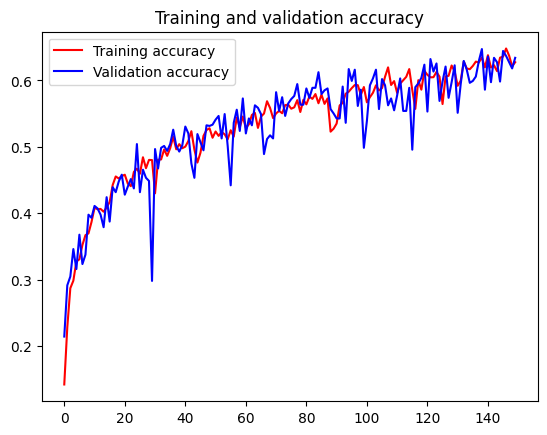

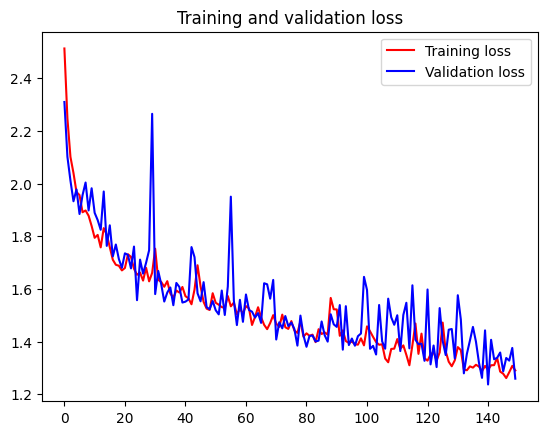

In [ ]:
#chart akurasi dan loss dari training dan validasi
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
#transfer_learning
from tensorflow.keras import regularizers
pretrained_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False)


for layer in pretrained_model.layers:
    layer.trainable = False


model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(17, kernel_regularizer=regularizers.l2(0.005), activation='softmax')
])


model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

callback = AccCallback()
history = model.fit(train_generator, epochs=30, batch_size=16, verbose=1 ,validation_data=valid_generator, callbacks=[callback])

Epoch 1/30
850/850 [==============================] - 215s 247ms/step - loss: 2.4199 - accuracy: 0.3153 - val_loss: 1.7302 - val_accuracy: 0.5835
Epoch 2/30
850/850 [==============================] - 204s 240ms/step - loss: 1.6954 - accuracy: 0.5493 - val_loss: 1.3452 - val_accuracy: 0.6741
Epoch 3/30
850/850 [==============================] - 205s 241ms/step - loss: 1.4577 - accuracy: 0.6121 - val_loss: 1.2027 - val_accuracy: 0.7074
Epoch 4/30
850/850 [==============================] - 204s 240ms/step - loss: 1.3302 - accuracy: 0.6471 - val_loss: 1.1235 - val_accuracy: 0.7147
Epoch 5/30
850/850 [==============================] - 204s 240ms/step - loss: 1.2435 - accuracy: 0.6695 - val_loss: 1.0738 - val_accuracy: 0.7282
Epoch 6/30
850/850 [==============================] - 205s 241ms/step - loss: 1.1822 - accuracy: 0.6872 - val_loss: 1.0377 - val_accuracy: 0.7394
Epoch 7/30
850/850 [==============================] - 214s 251ms/step - loss: 1.1461 - accuracy: 0.6986 - val_loss: 1.0069 -

KeyboardInterrupt: ignored

In [28]:
#transfer_learning
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D
pretrained_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False)

x = pretrained_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(17, kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

# for layer in pretrained_model.layers:
#     layer.trainable = False


# model = tf.keras.Sequential([
#     pretrained_model,
#     tf.keras.layers.GlobalAveragePooling2D(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(17, kernel_regularizer=regularizers.l2(0.005), activation='softmax')
# ])

model = Model(inputs=pretrained_model.input, outputs=predictions)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

callback = AccCallback()
history = model.fit_generator(train_generator, epochs=30, steps_per_epoch = 13600 // 16, validation_steps = 3400 // 16, verbose=1 ,validation_data=valid_generator, callbacks=[callback])

<ipython-input-28-2ec67d4177f2>:30: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=30, steps_per_epoch = 13600 // 16, validation_steps = 3400 // 16, verbose=1 ,validation_data=valid_generator, callbacks=[callback])


Epoch 1/30
850/850 [==============================] - 229s 245ms/step - loss: 2.5584 - accuracy: 0.2910 - val_loss: 1.7177 - val_accuracy: 0.6212
Epoch 2/30
850/850 [==============================] - 207s 244ms/step - loss: 1.5398 - accuracy: 0.6192 - val_loss: 1.0417 - val_accuracy: 0.7624
Epoch 3/30
850/850 [==============================] - 208s 245ms/step - loss: 1.1424 - accuracy: 0.7165 - val_loss: 0.8440 - val_accuracy: 0.8075
Epoch 4/30
850/850 [==============================] - 206s 242ms/step - loss: 0.9691 - accuracy: 0.7605 - val_loss: 0.7517 - val_accuracy: 0.8334
Epoch 5/30
850/850 [==============================] - 207s 244ms/step - loss: 0.8648 - accuracy: 0.7899 - val_loss: 0.6902 - val_accuracy: 0.8470
Epoch 6/30
850/850 [==============================] - 212s 250ms/step - loss: 0.7861 - accuracy: 0.8145 - val_loss: 0.6586 - val_accuracy: 0.8555
Epoch 7/30
850/850 [==============================] - 214s 251ms/step - loss: 0.7218 - accuracy: 0.8321 - val_loss: 0.6342 -

In [ ]:
#fine_tuning

for layer in preTrainModel.layers[:50]:
    layer.trainable = False


for layer in preTrainModel.layers[50:]:
    layer.trainable = True


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(train_generator, epochs=5, batch_size=32, validation_data=valid_generator)

Epoch 1/5
134/134 [==============================] - 43s 283ms/step - loss: 0.2114 - accuracy: 0.9577 - val_loss: 0.8639 - val_accuracy: 0.8598
Epoch 2/5
134/134 [==============================] - 36s 271ms/step - loss: 0.1971 - accuracy: 0.9572 - val_loss: 0.8643 - val_accuracy: 0.8664
Epoch 3/5
134/134 [==============================] - 36s 272ms/step - loss: 0.1734 - accuracy: 0.9610 - val_loss: 0.8782 - val_accuracy: 0.8636
Epoch 4/5
134/134 [==============================] - 36s 271ms/step - loss: 0.1865 - accuracy: 0.9589 - val_loss: 0.8694 - val_accuracy: 0.8674
Epoch 5/5
134/134 [==============================] - 37s 273ms/step - loss: 0.1995 - accuracy: 0.9598 - val_loss: 0.8687 - val_accuracy: 0.8645


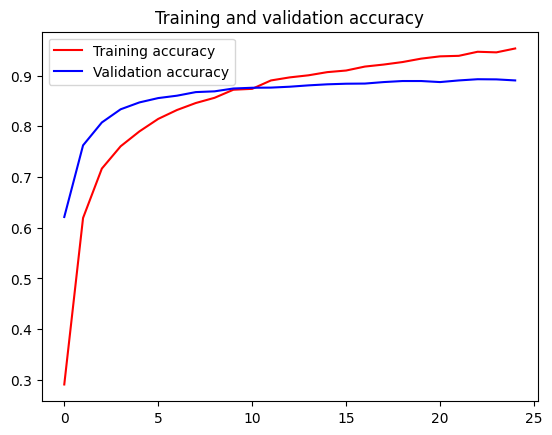

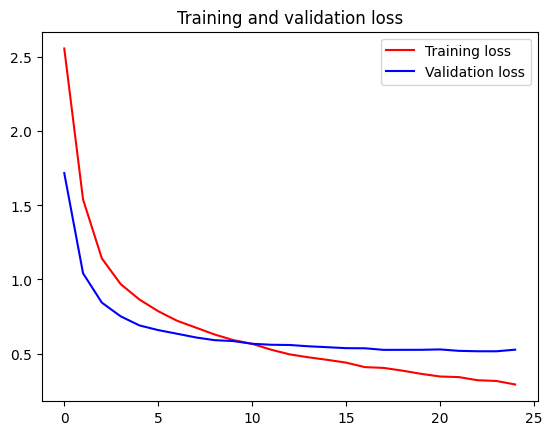

In [29]:
#chart akurasi dan loss dari training dan validasi
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#testing scan nasi goreng
# import numpy as np
# from tensorflow.keras.utils import load_img, img_to_array

# uploaded = files.upload()

# for fn in uploaded.keys():
#   path = '../food-classification/' + fn
#   img = load_img(path, target_size=(224, 224))
#   x = img_to_array(img)
#   x /= 255
#   x = np.expand_dims(x, axis=0)

#   images = np.vstack([x])
#   classes = model.predict(images, batch_size=10)
#   print(classes[0].max())
#   if classes[0].max()>0.5:
#     print(fn + " ini Nasi Goreng")
#   else:
#     print(fn + " bukan Nasi Goreng")

Saving Nasi-Goreng-spesial.jpg to Nasi-Goreng-spesial (2).jpg
Saving resep-nasi-goreng-ayam-kecap_43.jpeg to resep-nasi-goreng-ayam-kecap_43 (2).jpeg
Saving NasGor.jpg to NasGor (3).jpg
1/1 [==============================] - 0s 233ms/step
0.75518095
Nasi-Goreng-spesial.jpg ini Nasi Goreng
1/1 [==============================] - 0s 21ms/step
0.9997824
resep-nasi-goreng-ayam-kecap_43.jpeg ini Nasi Goreng
1/1 [==============================] - 0s 19ms/step
0.9999937
NasGor.jpg ini Nasi Goreng


In [30]:
model.save('./model.h5')
print("model saved !")

model saved !


In [32]:
#Fine tuning (upgrade model)
from tensorflow.keras.models import load_model

# Load the pre-trained model
pretrained_model = load_model('./model.h5')

# Freeze the layers of the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Add new layers on top of the pre-trained model for fine-tuning
model = Sequential()
model.add(pretrained_model)

# Add new fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

# Add the final output layer
num_classes = 17  # Define the number of classes in your classification task
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with your new dataset
history = model.fit(train_generator, steps_per_epoch=13600//16, epochs=2, validation_data=valid_generator, validation_steps=3400//16)

# Save the fine-tuned model
model.save('./fine_tuned_model.h5')

print('Fine-tuned model has been saved.')

Epoch 1/2
850/850 [==============================] - 228s 262ms/step - loss: 0.3506 - accuracy: 0.9777 - val_loss: 0.8481 - val_accuracy: 0.8892
Epoch 2/2
850/850 [==============================] - 221s 260ms/step - loss: 0.1778 - accuracy: 0.9892 - val_loss: 0.8340 - val_accuracy: 0.8892
Fine-tuned model has been saved.


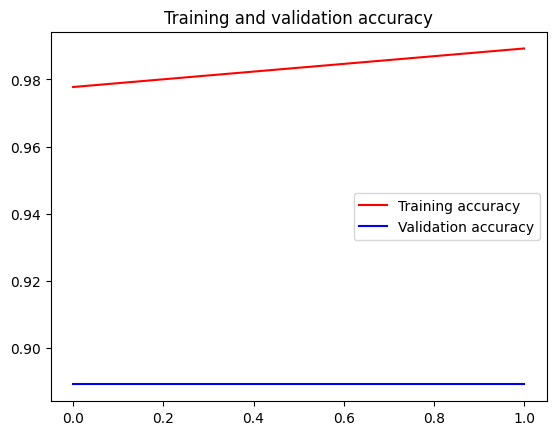

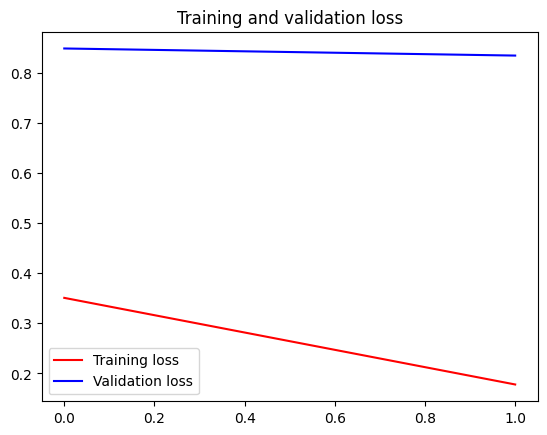

In [33]:
#chart akurasi dan loss dari training dan validasi
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [34]:
pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

In [35]:
#konversi tensorflow js
import tensorflowjs as tfjs

model_for_tfjs = tf.keras.models.load_model('./model.h5')

tfjs.converters.save_keras_model(model_for_tfjs, './tfjs_model')

In [36]:
#konversi tensorflow lite
model_for_tflite = tf.keras.models.load_model('./model.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(model_for_tflite)
tflite_model = converter.convert()

with open('./model.tflite', 'wb') as f:
  f.write(tflite_model)

In [37]:
#convert folder to zip
def create_zip(folder_path, zip_path):
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, folder_path)
                zipf.write(file_path, arcname)

# Path ke folder tfjs_model yang akan di-zip
folder_path = './tfjs_model'

# Path tempat menyimpan file ZIP
zip_path = './tfjs_model.zip'

# Membuat file ZIP dari folder tfjs_model
create_zip(folder_path, zip_path)

In [38]:
folder_path = './tflite_model'

zip_path = './tflite_model.zip'

create_zip(folder_path, zip_path)

In [41]:
from google.colab import files

files.download('tflite_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>